# The examples of boxplot visualisation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## LOAD TABLE

In [3]:
comb_peps = pd.read_csv(r'/Users/igorfesenko/Yandex Диск/Yandex.Disk.localized/Google_Drive/peptidome_review/tables/combined_alltypes_props.csv', index_col=False)

In [4]:
comb_peps['combined_index'] = comb_peps['organism']+'_'+comb_peps['location']

In [5]:
comb_peps_ms = comb_peps[comb_peps['type']=='MS']

In [13]:
comb_peps.head()

,protein,peptide,start,stop,prot_length,pep_length,MW,aromaticity,instability,pI,gravy,type,organism,location,combined_index
0,Pp3c15_25050V3.1.p,GPPPPPPPPPPPSN,425,439,780,14.0,1344.5137,0.000000,160.614286,5.525000,-1.592857,MS,moss,cell,moss_cell
1,Pp3c14_22870V3.1.p,AIAEYTIKINEGG,73,86,544,13.0,1378.5265,0.076923,-0.869231,4.531568,-0.007692,MS,moss,cell,moss_cell
2,PhpapaCp009,ATQIIDDTPKTKGKRSGLG,1,20,74,19.0,1986.2307,0.000000,28.942105,9.700703,-0.936842,MS,moss,cell,moss_cell
3,Pp3c5_17290V3.1.p,TVIGVAVAGVSTFDPVKRK,103,122,123,19.0,1944.2781,0.052632,48.242105,9.992164,0.605263,MS,moss,cell,moss_cell
4,Pp3c7_12850V3.1.p,ALVAGVLAAGAKVGSANA,65,83,270,18.0,1539.7749,0.000000,-4.705556,8.795051,1.300000,MS,moss,cell,moss_cell


In [34]:
df = pd.read_csv(r'/Users/igorfesenko/Yandex Диск/Yandex.Disk.localized/Google_Drive/PEP4/Growth_experiments/auxin.csv')

In [35]:
df.head()

,"diameter, mm",genotype,Genotype,treatment,Llog
0,22.062222,wt control,WT,control,4.463506
1,21.500278,wt control,WT,control,4.426283
2,20.578264,wt control,WT,control,4.363049
3,23.915694,wt control,WT,control,4.579886
4,20.197731,wt control,WT,control,4.336121


## Visualisation

In [8]:
pallette = ["#cc2936", "#6b818c", "#08415c","#cc2936","#6b818c","#f1bf98","#eee5e9"]

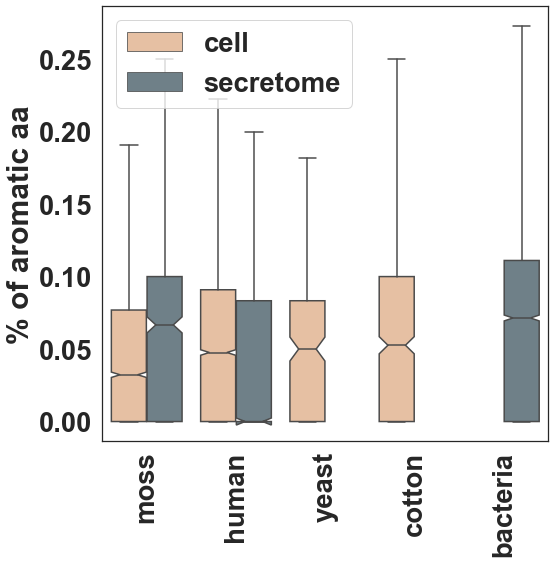

In [33]:
plt.figure(figsize=(8,8))
sns.set(style='white', font_scale=2.5, font="Arial")

sns.boxplot(x='organism', y='aromaticity', data=comb_peps_ms, hue='location', 
            palette=["#f1bf98","#6b818c"], showfliers=False, notch=True)

plt.ylabel("% of aromatic aa", fontweight='bold')
plt.xlabel("")

labels = ['moss','human', 'yeast', 'cotton','bacteria']
plt.xticks(ticks=np.arange(5), labels=labels, rotation=90)
plt.legend(loc='upper left');
#plt.savefig('./images/positive_selected.jpeg', dpi=300, bbox_inches='tight');

In [36]:
palette2 = ["#dd6e42","#e8dab2","#4f6d7a","#c0d6df","#eaeaea"]

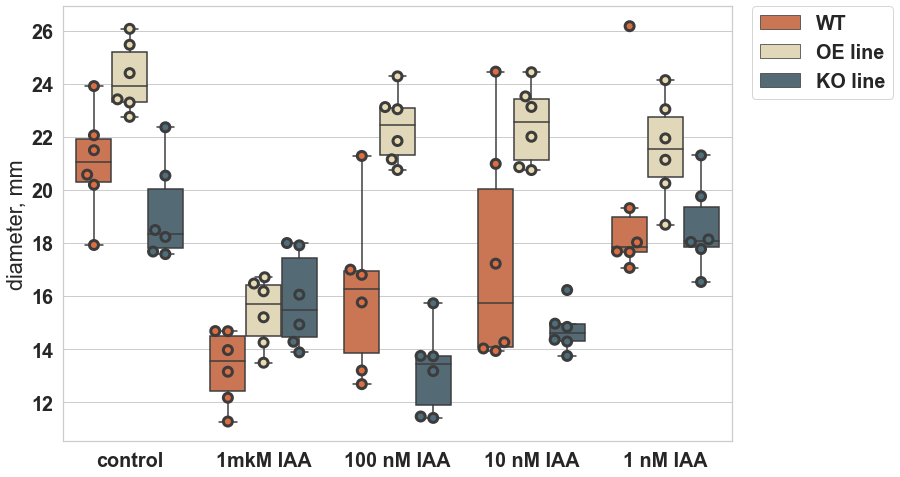

In [38]:
plt.figure(figsize=[12,8])
sns.set(style="whitegrid", font_scale=1.8)

g = sns.boxplot(data=df, x = 'treatment', y='diameter, mm', 
                hue ='Genotype', palette=palette2)

ax = sns.swarmplot(data=df, x = 'treatment', y='diameter, mm', 
                   hue='Genotype', dodge=True, size=9, palette=palette2,
                   linewidth=3, edgecolor='gray')
plt.xlabel("")

# Get the handles and labels. For this example it'll be 2 tuples of length 4 each.
handles, labels = ax.get_legend_handles_labels()
# When creating the legend, only use the first two elements to effectively remove the last two.
l = plt.legend(handles[:3], labels[:3], bbox_to_anchor=(1.03, 1), loc=2, borderaxespad=0.)
#plt.savefig('/Users/igorfesenko/Google Диск/PEP4/images/ABA.jpeg', dpi=300, bbox_inches='tight');

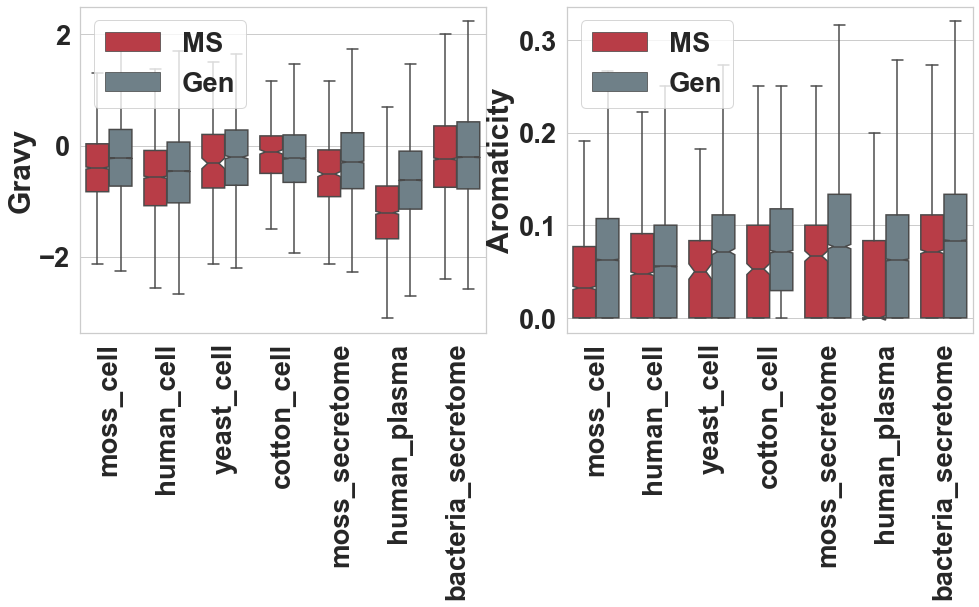

In [12]:
fig,axes = plt.subplots(1, 2, figsize=(16, 6))#sharey=True #sharex=True
sns.set(style='whitegrid', font_scale=2.5, font="Arial")

#gravy
sns.boxplot(ax=axes[0], x='combined_index', y='gravy', data=comb_peps, 
            hue='type', palette=pallette, showfliers=False, notch=True)
axes[0].set_ylabel("Gravy",fontweight='bold')
axes[0].set_xlabel("")
labels = ['moss_cell','human_cell', 'yeast_cell', 'cotton_cell', 'moss_secretome','human_plasma','bacteria_secretome']
axes[0].set_xticklabels(labels, rotation=90)
axes[0].legend(loc='upper left')

#aromaticity
sns.boxplot(ax=axes[1], x='combined_index', y='aromaticity', data=comb_peps, 
            hue='type', palette=pallette, showfliers=False,notch=True)
axes[1].set_ylabel("Aromaticity",fontweight='bold')
axes[1].set_xlabel("")
axes[1].set_xticklabels(labels, rotation=90)
axes[1].legend(loc='upper left')

plt.rcParams["font.weight"] = "bold"
#fig.tight_layout()
#plt.savefig('./images/gravy_aromaticity.jpeg', dpi=300, bbox_inches='tight');

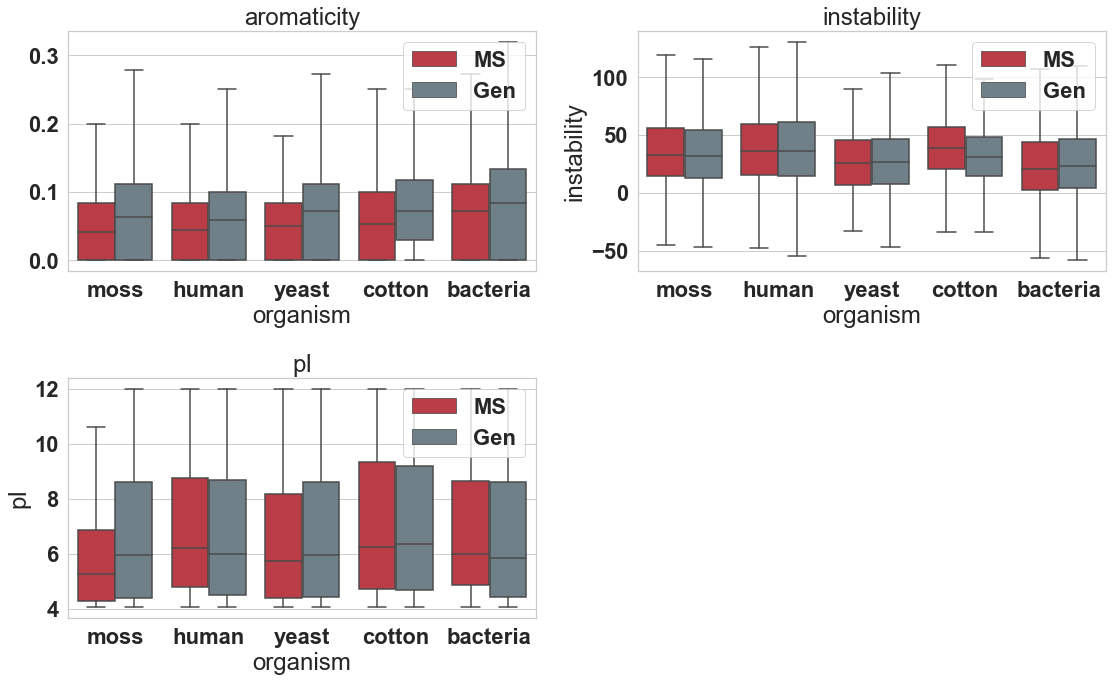

In [42]:
fig,axes = plt.subplots(2, 2, figsize=(16, 10))#sharey=True
sns.set(style='whitegrid', font_scale=2, font="Arial")

#aromaticity
sns.boxplot(ax=axes[0,0], data=comb_peps, x='organism', y='aromaticity', 
            hue='type',showfliers=False, palette=pallette)

#axes[0,0].set_xticklabels(['moss','human','yeast','cotton'])
axes[0,0].set_title("aromaticity")
axes[0,0].legend(loc='upper right')
axes[0,0].set_ylabel("")

#instability
sns.boxplot(ax=axes[0,1], data=comb_peps, x='organism', 
            y='instability', hue='type',showfliers=False, palette=pallette)
#axes[0,1].set_xticklabels(['moss','human','yeast','cotton'])
axes[0,1].set_title("instability")
axes[0,1].legend(loc='upper right')

#pI
sns.boxplot(ax=axes[1,0], data=comb_peps, x='organism', 
            y='pI', hue='type',showfliers=False, palette=pallette)
#axes[1,0].set_xticklabels(['moss','human','yeast','cotton'])
axes[1,0].set_title("pI")
axes[1,0].legend(loc='upper right')


# This line will delete the last empty plot
fig.delaxes(ax= axes[1,1]) 

fig.tight_layout()
#plt.savefig('./images/combined_cell_pep_properties.jpeg', dpi=300, bbox_inches='tight');